# Basic Time Series Models - Lab

## Introduction

Now that you have an initial understanding of the the White Noise and the Random Walk model, let's try to generate some examples!

## Objectives

You will be able to:
- Explain what the goal is of time series modeling
- Understand and explain what a White Noise model is
- Understand and explain what a Random Walk model is
- Understand the mathematical formulations of Random Walk and White Noise models

## A White Noise Model

To get a good sense of how a model works, it is always a good idea to generate a process. Let's consider the following example:
- Every day in August, September and October 2018, Nina takes the subway to work. Let's ignore weekends for now and assume that Nina works every day.
- We know that on average, it takes her 25 minutes, and the standard deviation is 4 minutes. 
- Create and visualize a time series that reflects this information.

Let's import pandas, numpy and matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12) # do not change this seed.

In [2]:
plt.style.use('ggplot')

Create the dates. You can do this using `pd.date_range`, more info [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html).

In [4]:
# your code here
dates = pd.date_range(start='8/1/2018', end='10/31/2018', freq='D')

Generate the values for the wite noise process representing Nina's commute in August and September.

In [9]:
times = np.random.normal(25, 4, size=len(dates))

Create a time series with the dates and the commute times.

In [13]:
ts = pd.DataFrame(index=dates)
ts['commute_time'] = times
ts.head()

,commute_time
2018-08-01,23.473821
2018-08-02,27.267375
2018-08-03,29.309347
2018-08-04,21.238565
2018-08-05,26.134428


Visualize the time series and set appropriate axis labels.

Text(0.5, 1.0, 'Commute Times by Day / Month')

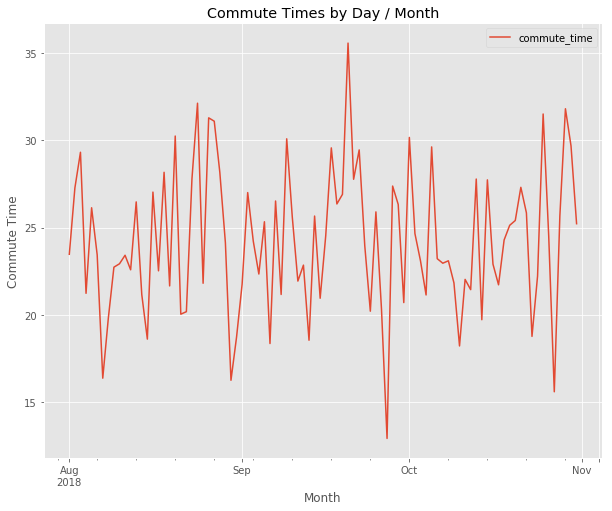

In [19]:
ts.plot(figsize=(10, 8))
plt.xlabel('Month')
plt.ylabel('Commute Time')
plt.title('Commute Times by Day / Month')

Print Nina's shortest and longest commute.

In [22]:
print(f'Shortest Commute: {ts.commute_time.min()}\nLongest Commute: {ts.commute_time.max()}')

Shortest Commute: 12.936338293193696
Longest Commute: 35.55618432265702


Look at the distribution of commute times.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


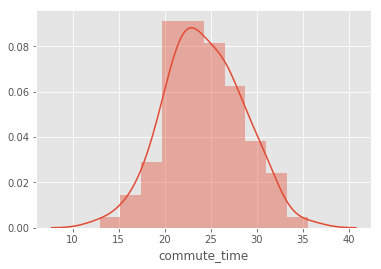

In [25]:
import seaborn as sns
sns.distplot(ts.commute_time)

Compute the standard deviation and the mean of the commute series. The fact that the mean and standard error are constant over time is crucial!

In [27]:
mean = ts.commute_time.mean()
std = ts.commute_time.std()
print(f'Mean: {mean}\nStandard Deviation: {std}')

Mean: 24.247845082199373
Standard Deviation: 4.161778213413832


Now, let's look at the mean and standard error for August and October respectively. 

In [35]:
aug = ts['08-2018']
october = ts['10-2018']
print(f'August Mean: {aug.mean()[0]}\nAugust Std: {aug.std()[0]}\n')
print(f'October Mean: {october.mean()[0]}\nOctober Std: {october.std()[0]}')

August Mean: 24.07116768612739
August Std: 4.364540014156047

October Mean: 24.333221524347657
October Std: 3.8792546243731234


Because you've generated this data, you know that the mean and constant will be the same over time. But comparing mean and standard deviation over time is useful practice for real data examples to check if a process is White Noise!

## A Random Walk Model

Remember from the lecture that the Random Walk Model:

- Has no specified mean or variance
- Has a strong depencence over time

Mathematically, this can be written as:

$$Y_t = Y_{t-1} + \epsilon_t$$

Because today's value depends on yesterday's, you need a starting value when you start off your time series. In practice, this is what the first few time series values look like:
$$ Y_0 = \text{some specified starting value}$$
$$Y_1= Y_{0}+ \epsilon_1 $$
$$Y_2= Y_{1}+ \epsilon_2 = Y_{0} + \epsilon_1 + \epsilon_2  $$
$$Y_3= Y_{2}+ \epsilon_3 = Y_{0} + \epsilon_1 + \epsilon_2 + \epsilon_3 $$
$$\ldots $$

Keeping this in mind, let's create a random walk model:
- starting from a value of 1000 USD of a share value upon a company's first IPO (initial public offering) in 2010 until end of november of the same year, generate a random walk model with a white noise error term, which has a standard error of 10.

In [93]:
# keep the random seed
np.random.seed(11)

# create a series with the specified dates
dates=pd.date_range(start='1/1/2010', end='11/30/2010', freq='D')

Y = []
error = 0
errors = np.random.normal(0, 10, len(dates))
for i in range(len(dates)):
    Y.append(1000 + error)
    error += errors[i]
    
ts = pd.DataFrame(data=Y, index=dates, columns=['Price'])
ts.head()

,Price
2010-01-01,1000.000000
2010-01-02,1017.494547
2010-01-03,1014.633817
2010-01-04,1009.788166
2010-01-05,983.254981


Visualize the time series with correct axis labels

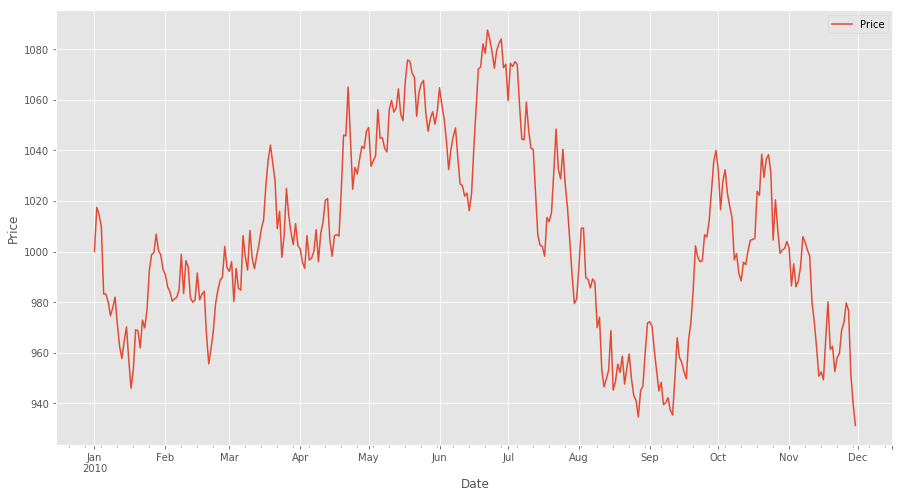

In [94]:
# your code here
ax = ts.plot(figsize=(15,8))
ax.set_ylabel("Price")
ax.set_xlabel("Date")
plt.show()

You can see how this very much looks like the exchange rate series you looked at in the lecture!

## Random Walk with a Drift

Repeat the above, but include a drift parameter $c$ of 8 now!

In [ ]:
# keep the random seed
np.random.seed(11)

In [91]:
# your code here
dates=pd.date_range(start='1/1/2010', end='11/30/2010', freq='D')

Y = [1000]
error = 0
errors = np.random.normal(0, 10, len(dates))
for i in range(len(dates)-1):
    error += errors[i] + 8
    Y.append(1000 + error)
    
ts_drift = pd.DataFrame(data=Y, index=dates, columns=['Price'])
ts_drift.head()

,Price
2010-01-01,1000.000000
2010-01-02,1000.887586
2010-01-03,1023.050312
2010-01-04,1003.397807
2010-01-05,991.151626


Text(0, 0.5, 'Price')

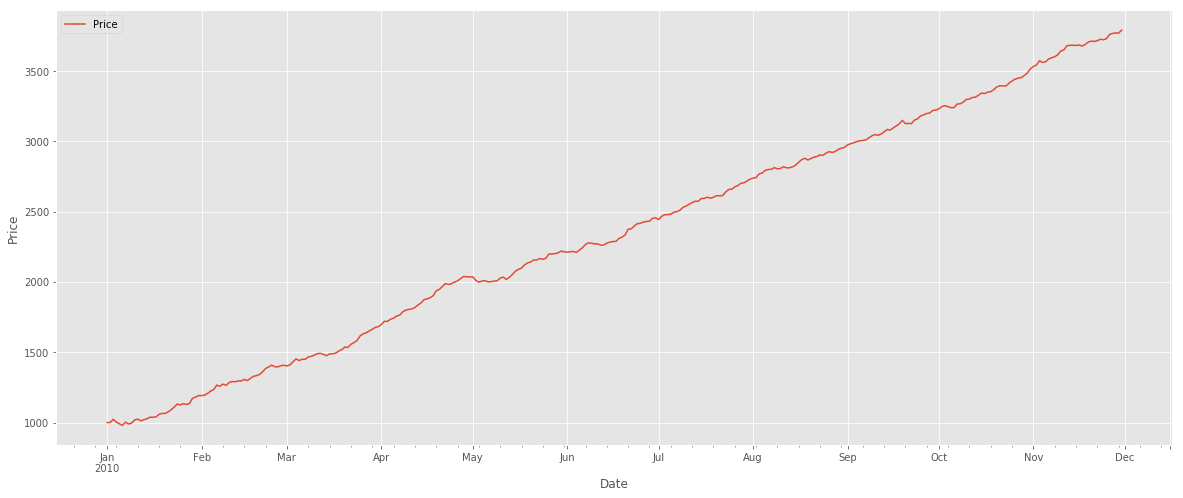

In [92]:
ax = ts_drift.plot(figsize=(20, 8))
ax.set_xlabel('Date')
ax.set_ylabel('Price')

Note that there is a very strong drift here!

## Differencing in a Random Walk model

One important property of the Random Walk model is that a differenced random walk returns a white noise. This is a result of the mathematical formula:

$$Y_t = Y_{t-1} + \epsilon_t$$
which is equivalent to
$$Y_t - Y_{t-1} = \epsilon_t$$

and we know that $\epsilon_t$ is a mean-zero white noise process! 

Plot the differenced time series for the shares time series (no drift).

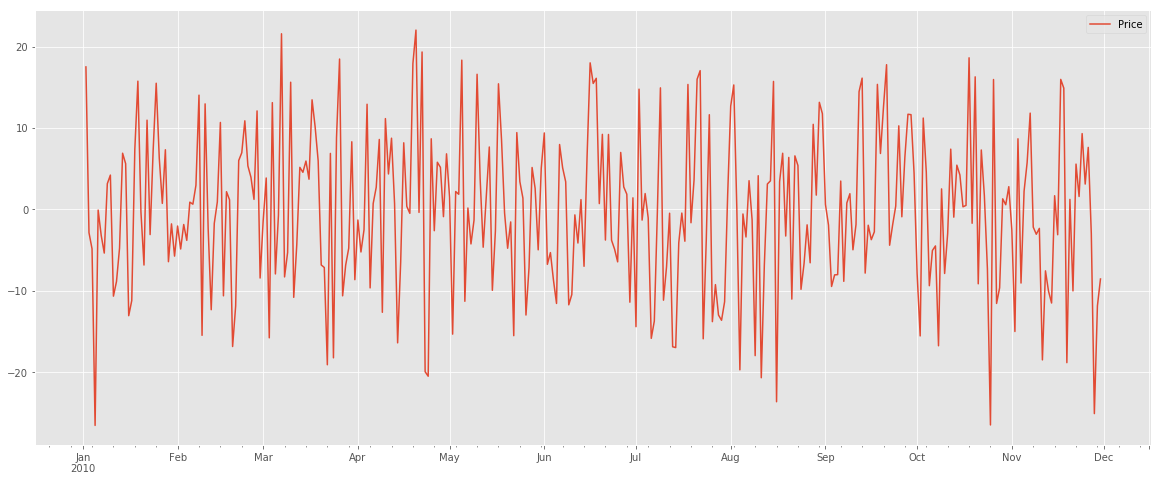

In [95]:
# your code here
ts_diff = ts.diff()
ts_diff.plot(figsize=(20, 8))

This does look a lot like a white noise series!

Plot the differenced time series for the shares time series (with a drift).

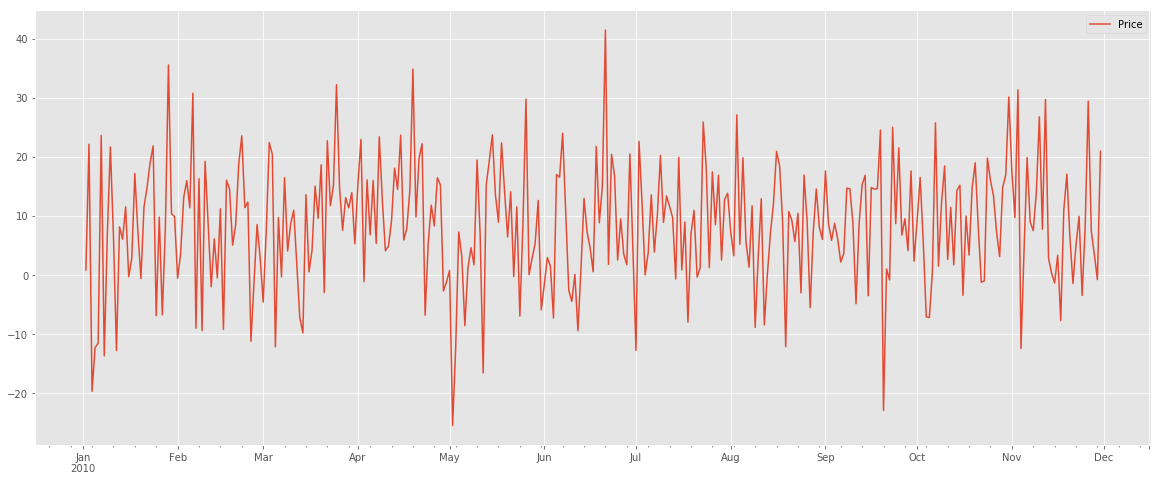

In [97]:
# your code here
ts_drift_diff = ts_drift.diff()
ts_drift_diff.plot(figsize=(20, 8))

This is also a white noise series, but what can you tell about the mean?

The mean is equal to the drift $c$, so 8 for this example!

## Summary

Great, you now know how a Random Walk and Moving Average model work!